In [21]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz,plot_tree
import pydotplus


In [22]:
lac_2022_df = pd.read_csv("../data/lac_2022_off_clean")
lac_off_df=lac_2022_df.copy()
lac_2022_df.head()

,week,OPP,OPP Score,LAC Score,Time,Quarter,Location,yards_to_endzone,Detail,Down,...,pass_incomplete,pass_yards_tally,intercepted,fumble,punt,field goal att,sacked,sack_yards,possession_team,team change
0,1,LVR,0,0,15:00,1,LAC 25,75,Austin Ekeler left tackle for 8 yards (tackle ...,1,...,0,0,0,0,0,0,0,0,LAC,0
1,1,LVR,0,0,14:45,1,LAC 33,67,Justin Herbert pass complete short right to Ke...,2,...,0,0,0,0,0,0,0,0,LAC,0
2,1,LVR,0,0,14:07,1,LAC 34,66,Zander Horvath up the middle for 2 yards (tack...,3,...,0,0,0,0,0,0,0,0,LAC,0
3,1,LVR,0,0,13:24,1,LAC 36,64,Austin Ekeler right tackle for 2 yards (tackle...,1,...,0,0,0,0,0,0,0,0,LAC,0
4,1,LVR,0,0,12:50,1,LAC 38,62,Justin Herbert pass complete short left to Jos...,2,...,0,9,0,0,0,0,0,0,LAC,0


In [23]:
lac_off_df = lac_2022_df.astype({'LAC Score': 'int8', 'OPP Score': 'int8','Down':'int8','Down':'int8','Quarter': 'int8','OPP':'string','week':'int8','rush_length':'int8','yardage_diff_2_3':'int8','yardage_diff_1_2':'int8','ToGo':'int8','rush_length':'int8','pass_length':'int8','1D_conv_good':'int8','2D_conv_good':'int8','3D_conv_good':'int8','3D_conv_good':'int8','4D_conv_good':'int8','rush_play':'int8','rush_yards_tally':'int8','pass_play':'int8','pass_complete':'int8','pass_incomplete':'int8','pass_yards_tally':'int8','intercepted':'int8','fumble':'int8','punt':'int8','field goal att':'int8','sacked':'int8','sack_yards':'int8','team change':'int8','possession_team':'string','Location':'string','Detail':'string','yards_to_endzone':'int8'})
lac_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   week              1232 non-null   int8  
 1   OPP               1232 non-null   string
 2   OPP Score         1232 non-null   int8  
 3   LAC Score         1232 non-null   int8  
 4   Time              1232 non-null   object
 5   Quarter           1232 non-null   int8  
 6   Location          1232 non-null   string
 7   yards_to_endzone  1232 non-null   int8  
 8   Detail            1232 non-null   string
 9   Down              1232 non-null   int8  
 10  ToGo              1232 non-null   int8  
 11  yardage_diff_1_2  1232 non-null   int8  
 12  yardage_diff_2_3  1232 non-null   int8  
 13  rush_length       1232 non-null   int8  
 14  pass_length       1232 non-null   int8  
 15  1D_conv_good      1232 non-null   int8  
 16  2D_conv_good      1232 non-null   int8  
 17  3D_conv_good  

In [24]:
lac_off_df.head()

,week,OPP,OPP Score,LAC Score,Time,Quarter,Location,yards_to_endzone,Detail,Down,...,pass_incomplete,pass_yards_tally,intercepted,fumble,punt,field goal att,sacked,sack_yards,possession_team,team change
0,1,LVR,0,0,15:00,1,LAC 25,75,Austin Ekeler left tackle for 8 yards (tackle ...,1,...,0,0,0,0,0,0,0,0,LAC,0
1,1,LVR,0,0,14:45,1,LAC 33,67,Justin Herbert pass complete short right to Ke...,2,...,0,0,0,0,0,0,0,0,LAC,0
2,1,LVR,0,0,14:07,1,LAC 34,66,Zander Horvath up the middle for 2 yards (tack...,3,...,0,0,0,0,0,0,0,0,LAC,0
3,1,LVR,0,0,13:24,1,LAC 36,64,Austin Ekeler right tackle for 2 yards (tackle...,1,...,0,0,0,0,0,0,0,0,LAC,0
4,1,LVR,0,0,12:50,1,LAC 38,62,Justin Herbert pass complete short left to Jos...,2,...,0,9,0,0,0,0,0,0,LAC,0


In [25]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(lac_off_df):
    # Filter rows based on column: 'Down'
    lac_off_df = lac_off_df[lac_off_df['Down'] !=4 ]
    # Drop columns: 'team change', 'possession_team' and 10 other columns
    lac_off_df = lac_off_df.drop(columns=['possession_team','OPP','Location','Detail','team change', 'Time','possession_team','intercepted','pass_length','rush_length','pass_complete','pass_incomplete','4D_conv_good', 'rush_play', 'fumble','pass_play','punt','field goal att','yardage_diff_2_3', 'sack_yards', 'sacked', '1D_conv_good', '2D_conv_good'])
    lac_off_df=pd.get_dummies(lac_off_df)
    return lac_off_df

lac_off_df_clean = clean_data(lac_off_df.copy())
lac_off_df_clean.head()

,week,OPP Score,LAC Score,Quarter,yards_to_endzone,Down,ToGo,yardage_diff_1_2,3D_conv_good,rush_yards_tally,pass_yards_tally
0,1,0,0,1,75,1,10,0,0,8,0
1,1,0,0,1,67,2,2,8,0,0,0
2,1,0,0,1,66,3,1,0,1,2,0
3,1,0,0,1,64,1,10,0,0,2,0
4,1,0,0,1,62,2,8,2,0,0,9


In [26]:
X=lac_off_df_clean.copy()
X.drop("3D_conv_good", axis=1, inplace=True)

X.head()

,week,OPP Score,LAC Score,Quarter,yards_to_endzone,Down,ToGo,yardage_diff_1_2,rush_yards_tally,pass_yards_tally
0,1,0,0,1,75,1,10,0,8,0
1,1,0,0,1,67,2,2,8,0,0
2,1,0,0,1,66,3,1,0,2,0
3,1,0,0,1,64,1,10,0,2,0
4,1,0,0,1,62,2,8,2,0,9


In [27]:
# Define target vector
y=lac_off_df_clean["3D_conv_good"].ravel()
y[:5]

array([0, 0, 1, 0, 0], dtype=int8)

In [28]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=617)

In [29]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [31]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=618, random_state=78)

In [33]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [34]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [35]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,260,11
Actual 1,13,17


Accuracy Score : 0.920265780730897
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       271
           1       0.61      0.57      0.59        30

    accuracy                           0.92       301
   macro avg       0.78      0.76      0.77       301
weighted avg       0.92      0.92      0.92       301



In [37]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.23679259419173906, 'Down'),
 (0.1793965376528282, 'ToGo'),
 (0.15550158545713674, 'yards_to_endzone'),
 (0.10408160189625985, 'week'),
 (0.07879022287572324, 'LAC Score'),
 (0.07664485349295355, 'OPP Score'),
 (0.06559573577441327, 'rush_yards_tally'),
 (0.04241810787058866, 'Quarter'),
 (0.03793359831879602, 'pass_yards_tally'),
 (0.022845162469561368, 'yardage_diff_1_2')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

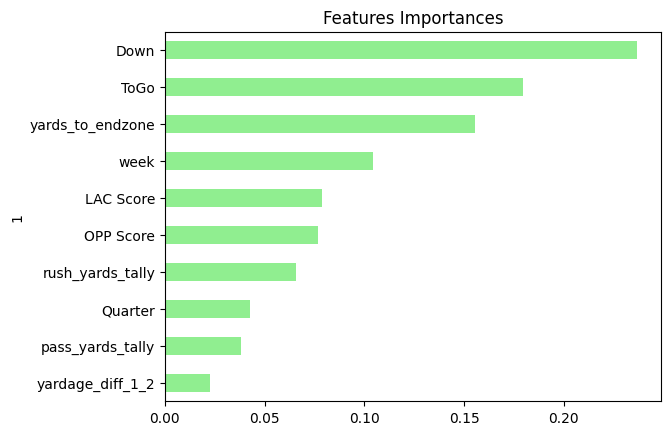

In [38]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

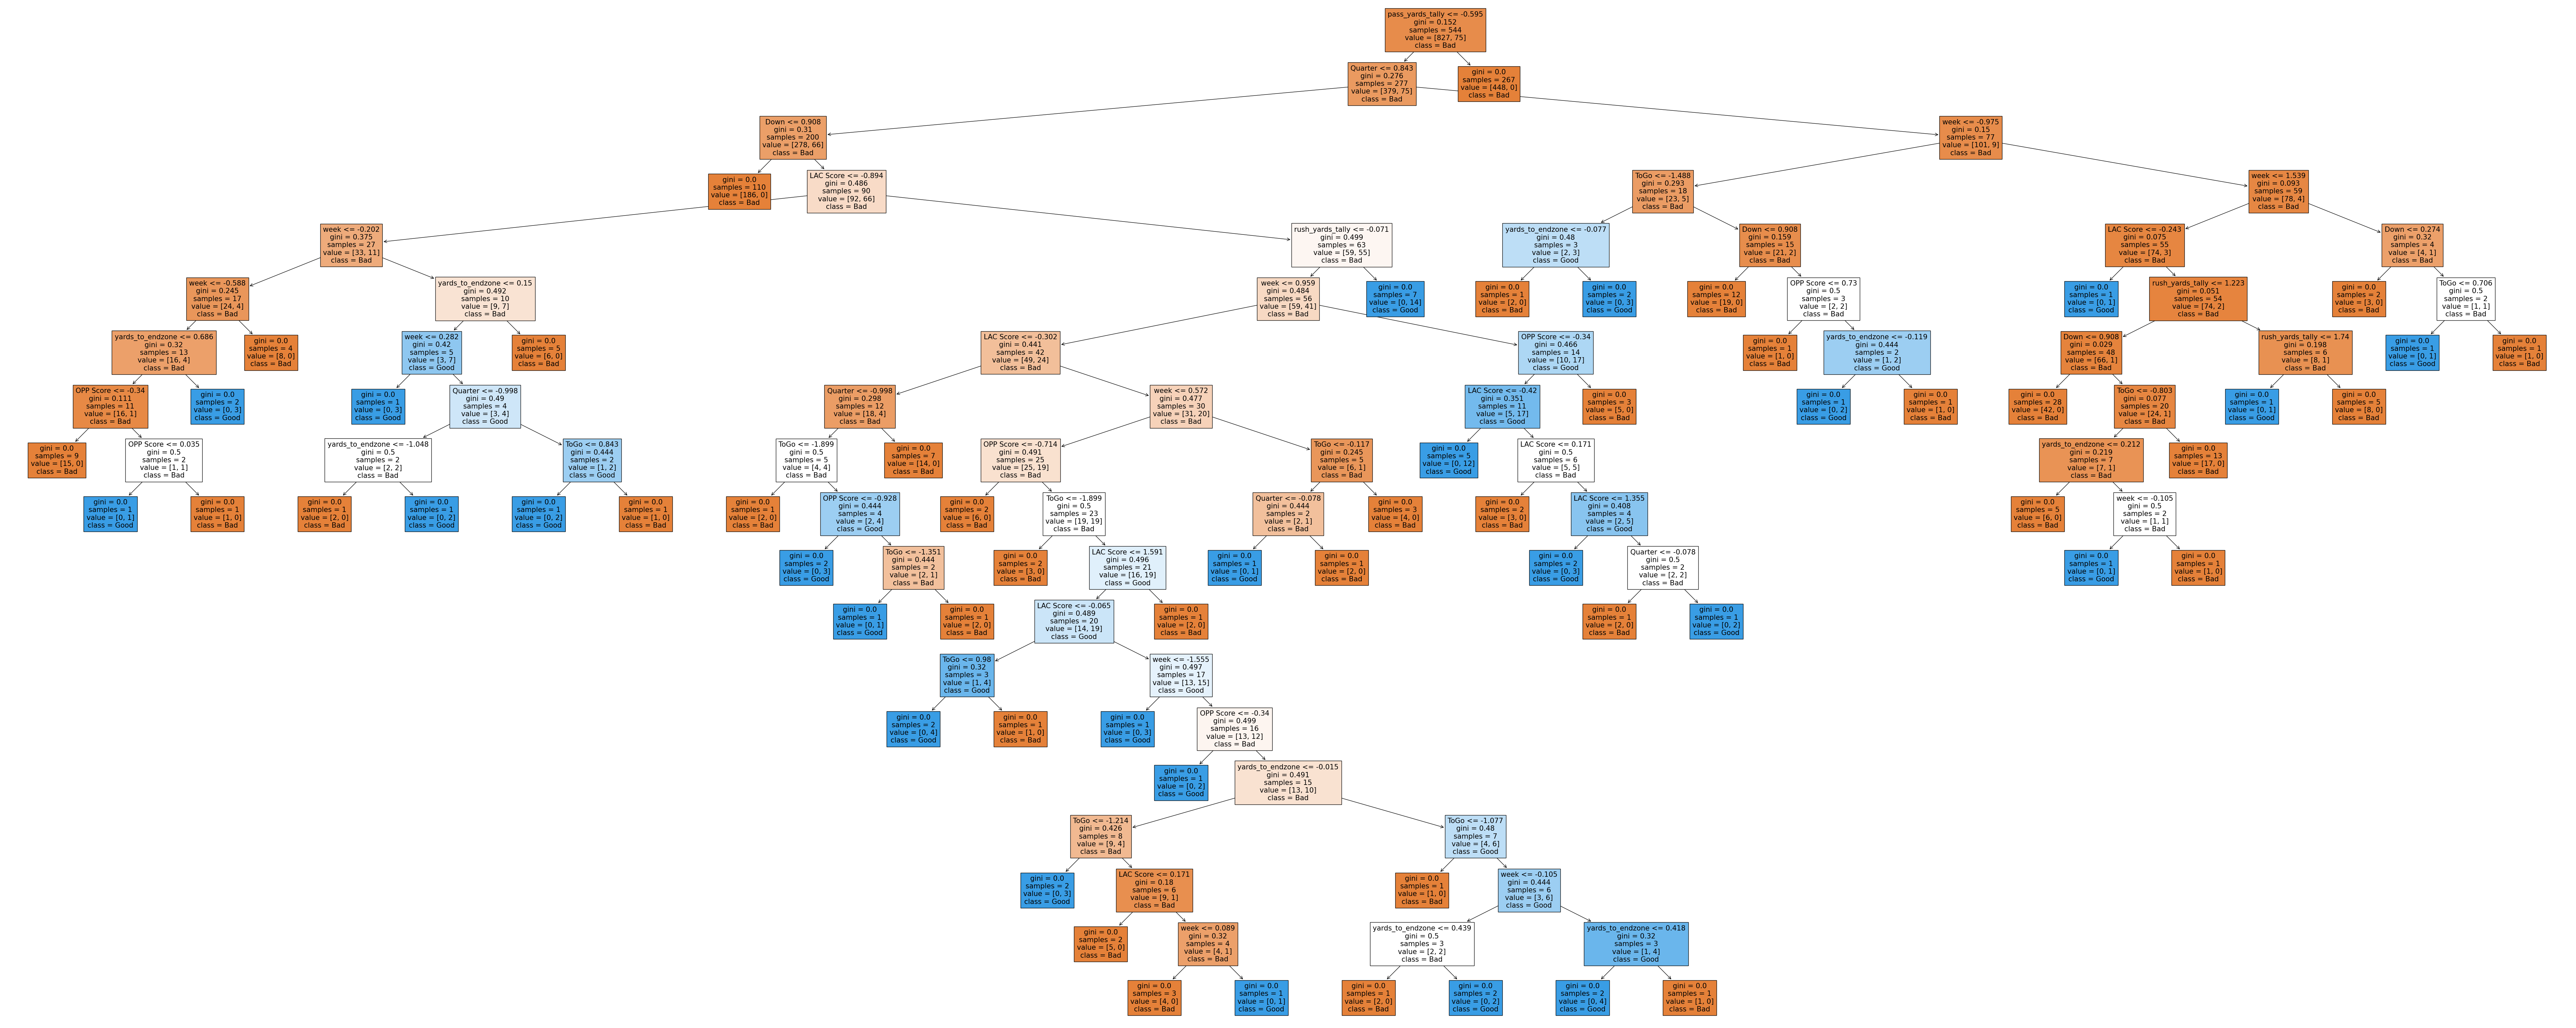

In [39]:
feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(100, 40))
plot_tree(rf_model.estimators_[617], feature_names=feature_names, class_names=['Bad', 'Good'], filled=True)
plt.show()